In [ ]:
# Job Scraper Project
This notebook will:
1. Scrape job postings from the web
2. Save them into a CSV file
3. Store them into a SQLite database
4. Run SQL queries for analysis

In [2]:
# Install required packages
!pip install requests beautifulsoup4 pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Step 1: Scrape Job Data

In [5]:
URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

results = soup.find_all("div", class_="card-content")

jobs = []
for job_elem in results:
    title = job_elem.find("h2", class_="title").text.strip()
    company = job_elem.find("h3", class_="company").text.strip()
    location = job_elem.find("p", class_="location").text.strip()
    jobs.append((title, company, location))

df = pd.DataFrame(jobs, columns=["Title", "Company", "Location"])
df.to_csv("jobs.csv", index=False)
df.head(50)

,Title,Company,Location
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA"
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA"
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA"
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP"
4,Product manager,Ramirez Inc,"North Jamieview, AP"
5,Medical technical officer,Rogers-Yates,"Davidville, AP"
6,Physiological scientist,Kramer-Klein,"South Christopher, AE"
7,Textile designer,Meyers-Johnson,"Port Jonathan, AE"
8,Television floor manager,Hughes-Williams,"Osbornetown, AE"
9,Waste management officer,"Jones, Williams and Villa","Scotttown, AP"


## Step 2: Save to SQLite Database

In [6]:
conn = sqlite3.connect("jobs.db")
df.to_sql("jobs", conn, if_exists="replace", index=False)
conn.commit()
print("Data inserted into jobs.db ✅")

Data inserted into jobs.db ✅


## Step 3: Run SQL Queries

In [7]:
query = "SELECT Company, COUNT(*) as JobCount FROM jobs GROUP BY Company ORDER BY JobCount DESC LIMIT 10"
top_companies = pd.read_sql_query(query, conn)
top_companies

,Company,JobCount
0,Garcia PLC,2
1,Yates-Ferguson,1
2,Wood Inc,1
3,"Williams, Peterson and Rojas",1
4,"Waters, Wilson and Hoover",1
5,Washington-Castillo,1
6,Washington PLC,1
7,Walker-Simpson,1
8,Vasquez-Davidson,1
9,Vasquez Ltd,1


## Step 4: Visualization

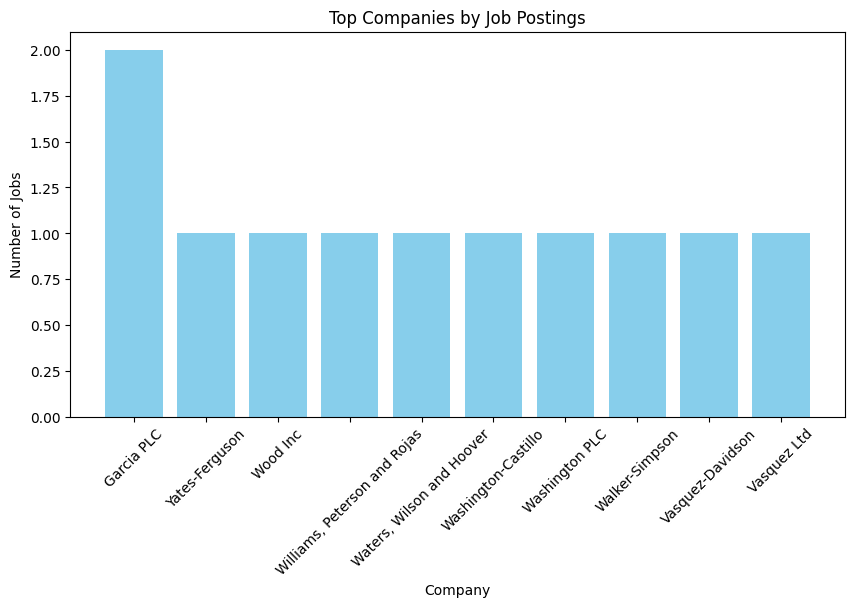

In [8]:
plt.figure(figsize=(10,5))
plt.bar(top_companies["Company"], top_companies["JobCount"], color="skyblue")
plt.xticks(rotation=45)
plt.title("Top Companies by Job Postings")
plt.xlabel("Company")
plt.ylabel("Number of Jobs")
plt.show()